In [22]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as plt

In [3]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [21]:
print(data.shape)

(1338, 9)


# Détectez les erreurs
#### les valeurs manquantes 

In [4]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### les doublons 

In [5]:
s = data.duplicated()
data = data.assign(duplicated=s)
data

,age,sex,bmi,children,smoker,region,charges,duplicated
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False
1334,18,female,31.920,0,no,northeast,2205.98080,False
1335,18,female,36.850,0,no,southeast,1629.83350,False
1336,21,female,25.800,0,no,southwest,2007.94500,False


In [6]:
data['duplicated'].unique()

array([False,  True])

In [7]:
duplicate_rows = data[data["duplicated"] == True]
print(duplicate_rows)

     age   sex    bmi  children smoker     region    charges  duplicated
581   19  male  30.59         0     no  northwest  1639.5631        True


In [8]:
data.loc[data['charges'].duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges,duplicated
195,19,male,30.59,0,no,northwest,1639.5631,False
581,19,male,30.59,0,no,northwest,1639.5631,True


In [18]:
data['charges'].min()

1121.8739

In [20]:
def classify_bmi(row):
    if row["bmi"] < 25:
        return "normal"
    elif row["bmi"] < 30:
        return "overweight"
    else:
        return "obese"

data["bmi_class"] = data.apply(classify_bmi, axis=1)
data

,age,sex,bmi,children,smoker,region,charges,duplicated,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,False,overweight
1,18,male,33.770,1,no,southeast,1725.55230,False,obese
2,28,male,33.000,3,no,southeast,4449.46200,False,obese
3,33,male,22.705,0,no,northwest,21984.47061,False,normal
4,32,male,28.880,0,no,northwest,3866.85520,False,overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False,obese
1334,18,female,31.920,0,no,northeast,2205.98080,False,obese
1335,18,female,36.850,0,no,southeast,1629.83350,False,obese
1336,21,female,25.800,0,no,southwest,2007.94500,False,overweight


<AxesSubplot:xlabel='sex', ylabel='count'>

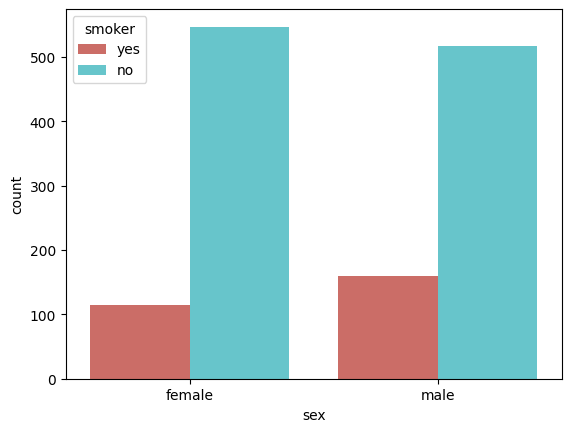

In [24]:
sns.countplot(x='sex', data = data, hue = 'smoker', palette= 'hls')

<AxesSubplot:xlabel='sex', ylabel='charges'>

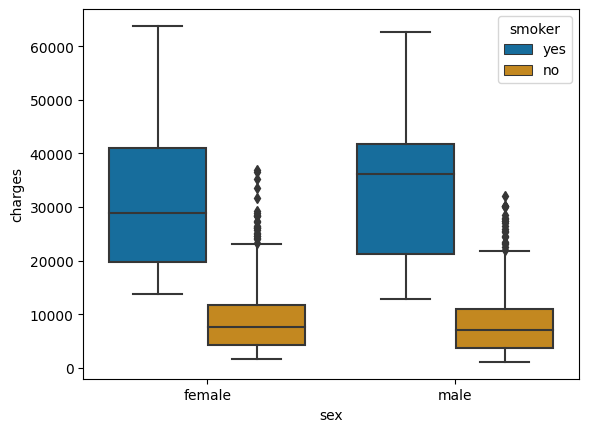

In [25]:
sns.boxplot(x='sex', y= 'charges', data = data, hue = 'smoker',
                     palette= 'colorblind')

<AxesSubplot:xlabel='sex', ylabel='charges'>

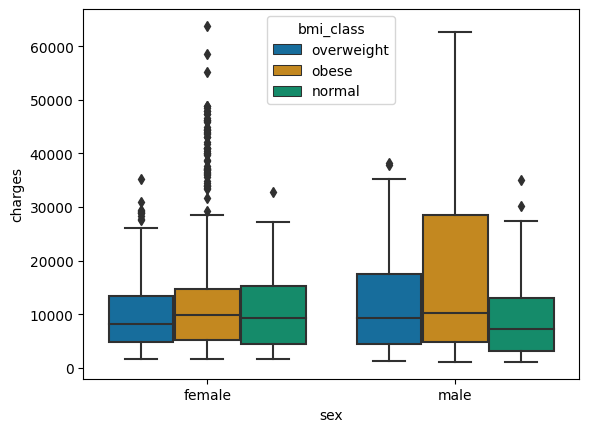

In [28]:
sns.boxplot(x='sex', y= 'charges', data = data, hue = 'bmi_class',
                     palette= 'colorblind')

<AxesSubplot:xlabel='region', ylabel='charges'>

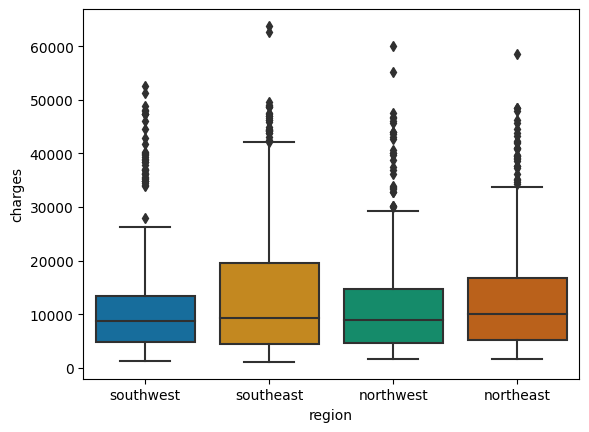

In [29]:
sns.boxplot(x='region', y= 'charges', data = data,
                     palette= 'colorblind')

<AxesSubplot:xlabel='region', ylabel='charges'>

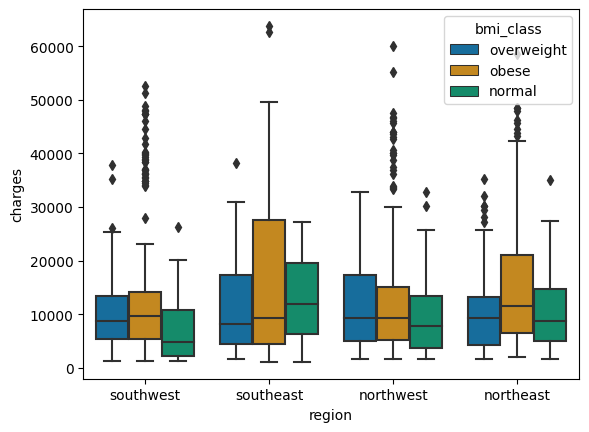

In [32]:
sns.boxplot(x='region', y= 'charges', data = data, hue = 'bmi_class',
                     palette= 'colorblind')

<AxesSubplot:xlabel='charges', ylabel='Count'>

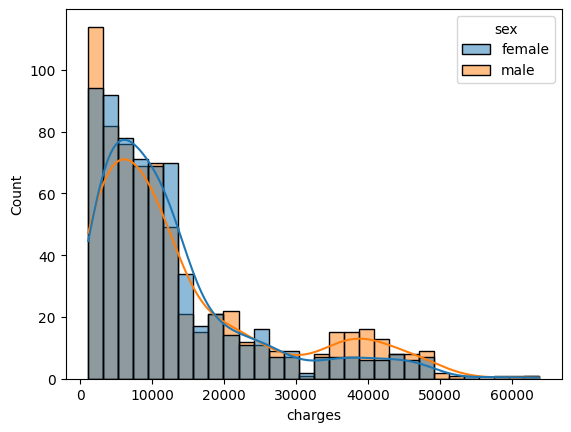

In [35]:
sns.histplot(x = 'charges', data = data, hue = 'sex', kde = True)


In [38]:
fig, ax = plt.subplots(1,2,figsize=(10,7))
plt.sca(ax[0])
sns.histplot(x= 'charges', data = data[data['smoker']=='No'],
                         bins = 25, color = 'red')
plt.title("Smoker = No")

plt.sca(ax[1])
sns.histplot(x= 'charges', data = data[data['smoker']=='Yes'], bins = 25)
plt.title("Smoker = Yes")


AttributeError: module 'matplotlib' has no attribute 'subplots'